In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None
w.simplefilter(action="ignore", category=FutureWarning)

In [2]:
## Uncomment once per computer
#!pip install Thermobar
#!pip install "https://github.com/PennyWieser/Thermobar_onnx/archive/refs/tags/0.02.zip"
import Thermobar as pt

In [3]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Loading in Krawzinski 1 sigma microprobe error data

In [4]:
Kraw_07=pd.read_excel('Supporting_Data_3.xlsx', 
                      sheet_name='Kraw13_042907_Analyses')
Kraw_06=pd.read_excel('Supporting_Data_3.xlsx', 
                      sheet_name='Kraw13_083006_Analyses')

In [5]:
Kraw_07_Cpx=Kraw_07.loc[(Kraw_07['Phase']=="cpx")]
Kraw_06_Cpx=Kraw_06.loc[(Kraw_06['Phase']=="cpx")]

Kraw_07_Cpx_Na=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="Na2O"]
Kraw_06_Cpx_Na=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="Na2O"]

Kraw_07_Cpx_Al=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="Al2O3"]
Kraw_06_Cpx_Al=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="Al2O3"]

Kraw_07_Cpx_Si=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="SiO2"]
Kraw_06_Cpx_Si=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="SiO2"]

Kraw_07_Cpx_Ti=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="TiO2"]
Kraw_06_Cpx_Ti=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="TiO2"]

Kraw_07_Cpx_Mn=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="MnO"]
Kraw_06_Cpx_Mn=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="MnO"]

Kraw_07_Cpx_Mg=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="MgO"]
Kraw_06_Cpx_Mg=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="MgO"]

Kraw_07_Cpx_Fe=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="FeO"]
Kraw_06_Cpx_Fe=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="FeO"]

Kraw_07_Cpx_Ca=Kraw_07_Cpx.loc[Kraw_07_Cpx['Element']=="CaO"]
Kraw_06_Cpx_Ca=Kraw_06_Cpx.loc[Kraw_06_Cpx['Element']=="CaO"]


Kraw_07_Amp=Kraw_07.loc[Kraw_07['Phase']=="amp"]
Kraw_06_Amp=Kraw_06.loc[Kraw_06['Phase']=="amp"]

Kraw_07_Amp_Na=Kraw_07_Amp.loc[Kraw_07_Amp['Element']=="Na2O"]
Kraw_06_Amp_Na=Kraw_06_Amp.loc[Kraw_06_Amp['Element']=="Na2O"]

Kraw_06_Cali=pd.read_excel('Supporting_Data_3.xlsx', 
                           sheet_name='Kraw13_083006_Cali')
Kraw_06_Cali_Na5=Kraw_06_Cali.loc[Kraw_06_Cali['Element']=="Na5-1"]

## Real compositions from Mikes B1038 experiments
- 8 kbar, 1050 C

In [6]:
Exp_Cond=pd.read_excel('Supporting_Data_2.xlsx',  sheet_name='Exp_Cond')
out_Cpx_B1038=pt.import_excel('Supporting_Data_2.xlsx',
                              sheet_name='B1038', suffix="_Cpx")
Cpx_B1038_all=out_Cpx_B1038['Cpxs']
Cpx_B1038_input_all=out_Cpx_B1038['my_input']

# As has all minerals, need to filter out things that arent Cpx
IsCpx_B1038=Cpx_B1038_input_all['phase']=="cpx"
Cpx_B1038=Cpx_B1038_all.loc[IsCpx_B1038].reset_index(drop=True)
Cpx_B1038_input=Cpx_B1038_input_all.loc[IsCpx_B1038].reset_index(drop=True)
H2O_B1038=Exp_Cond.loc[Exp_Cond['Experiment']=="B1038", 'H2O_Liq'].iloc[0]
Cpx_B1038_MeanNa=Cpx_B1038.copy()
Cpx_B1038_MeanNa['Na2O_Cpx']=np.mean(Cpx_B1038_MeanNa['Na2O_Cpx'])
Cpx_B1038_MeanAl=Cpx_B1038.copy()
Cpx_B1038_MeanAl['Al2O3_Cpx']=np.mean(Cpx_B1038_MeanAl['Al2O3_Cpx'])

Cpx_B1038_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038, H2O_Liq=H2O_B1038)
Cpx_B1038_Calc_MeanNa=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038_MeanNa, H2O_Liq=H2O_B1038)
Cpx_B1038_Calc_MeanAl=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038_MeanAl, H2O_Liq=H2O_B1038)


out_Liq_B1038=pt.import_excel('Supporting_Data_2.xlsx',  sheet_name='B1038_Glass', suffix="_Liq")
Liq_B1038_all=out_Liq_B1038['Liqs']
Liq_B1038_input_all=out_Liq_B1038['my_input']


## Making MC for Cpx - B1038 using the Analytical 1 sigma values from 2006

In [7]:
Kraw_06_B1038_cpx2=Kraw_06.loc[Kraw_06['Name']=="B1038-cpx2"]
B1038_Cpx2=Cpx_B1038.mean(axis=0).to_frame().T

B1038_Cpx_Err1=pd.DataFrame(data={'SiO2_Cpx_Err': Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Cpx_Err':Kraw_06_B1038_cpx2.loc[Kraw_06_B1038_cpx2['Element']=="Cr2O3", 'Error_Per'].values,
                               'K2O_Cpx_Err': 0}, index=[0])
B1038_CpxAv_noise1=pt.add_noise_sample_1phase(phase_comp=B1038_Cpx2, phase_err=B1038_Cpx_Err1,
                                             phase_err_type="Perc", duplicates=5000, err_dist="normal", positive=False)
B1038_CpxAv_noise1_N500=pt.add_noise_sample_1phase(phase_comp=B1038_Cpx2, phase_err=B1038_Cpx_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal", positive=False)
Cpx_B1038_Calc_Syn=pt.calculate_cpx_only_press_all_eqs(cpx_comps=B1038_CpxAv_noise1, H2O_Liq=H2O_B1038)
Cpx_B1038_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038, H2O_Liq=H2O_B1038)
Cpx_B1038_Calc_Av=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_B1038.mean(axis=0).to_frame().T, H2O_Liq=H2O_B1038)

## Making MC for liquids fro Krawzinkski et al- Using errors from 2007, as dont have from 2006

In [8]:



Kraw_06_B1038_Liq2=Kraw_07.loc[Kraw_07['Name']=="B1038 Glass"]
B1038_Liq2=pd.DataFrame(data={'SiO2_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="SiO2", 'Ox-Wt%'].values,
                            'TiO2_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="TiO2", 'Ox-Wt%'].values,
                             'Al2O3_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Al2O3", 'Ox-Wt%'].values,
                             'FeOt_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="FeO", 'Ox-Wt%'].values,
                            'MnO_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="MnO", 'Ox-Wt%'].values,
                            'MgO_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="MgO", 'Ox-Wt%'].values,
                            'CaO_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="CaO", 'Ox-Wt%'].values,
                            'Na2O_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Na2O", 'Ox-Wt%'].values,
                              'K2O_Liq': Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="K2O", 'Ox-Wt%'].values,
                            'Cr2O3_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Cr2O3", 'Ox-Wt%'].values,
                              'P2O5_Liq':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="P2O5", 'Ox-Wt%'].values,
                            'H2O_Liq': H2O_B1038
                             }, index=[0])
B1038_Liq2['Sample_ID_Liq']="B1038_Liq2"

B1038_Liq_Err2=pd.DataFrame(data={'SiO2_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Na2O", 'Error_Per'].values,
                              'K2O_Liq_Err': Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="K2O", 'Error_Per'].values,
                            'Cr2O3_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Cr2O3", 'Error_Per'].values,
                              'P2O5_Liq_Err':Kraw_06_B1038_Liq2.loc[Kraw_06_B1038_Liq2['Element']=="Cr2O3", 'Error_Per'].values,
                            'H2O_Liq_Err':0,
                             }, index=[0])



B1038_LiqAv_noise1=pt.add_noise_sample_1phase(phase_comp=Liq_B1038_all.mean(axis=0).to_frame().T, 
                                              phase_err=B1038_Liq_Err2,
                                             phase_err_type="Perc", duplicates=5000, err_dist="normal", positive=False)

B1038_LiqAv_noise1_N500=pt.add_noise_sample_1phase(phase_comp=Liq_B1038_all.mean(axis=0).to_frame().T,
                                                   phase_err=B1038_Liq_Err2,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal", positive=False)



## Calculating PT for mean Cpx and mean liquid composition. 

In [9]:
# Mean liquid, Mean Cpx
B1038_Cpx_Liq_N17_eq33_Liq_Mean=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all.mean(axis=0).to_frame().T, 
                                                                         cpx_comps=Cpx_B1038.mean(axis=0).to_frame().T,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Neave2017", return_all_pairs=True
                                                                  ).get('All_PTs')

B1038_Cpx_Liq_30_eq33_Liq_Mean=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all.mean(axis=0).to_frame().T,
                                                                        cpx_comps=Cpx_B1038.mean(axis=0).to_frame().T,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Put2008_eq30", return_all_pairs=True
                                                                 ).get('All_PTs')

Considering N=1 Cpx & N=1 Liqs, which is a total of N=1 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1 Cpx-Liq matches using the specified filter. N=1 Cpx out of the N=1 Cpx that you input matched to 1 or more liquids
Considering N=1 Cpx & N=1 Liqs, which is a total of N=1 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1 Cpx-Liq matches using the specified filter. N=1 Cpx out of the N=1 Cpx that you input matched to 1 or more liquids


## Kraw-2013 - Calculating all Cpx-Liq matches (measured)

In [10]:
# all possible Liq- Cpx matches
B1038_Cpx_Liq_N17_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all,
                                                                    cpx_comps=Cpx_B1038,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Neave2017", return_all_pairs=True
                                                                  ).get('All_PTs')

B1038_Cpx_Liq_30_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all, cpx_comps=Cpx_B1038,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Put2008_eq30", return_all_pairs=True
                                                                 ).get('All_PTs')

B1038_Cpx_Liq_31_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all, cpx_comps=Cpx_B1038,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Put2008_eq31", return_all_pairs=True,
                                                        ).get('All_PTs')

B1038_Cpx_Liq_32c_eq33_Liq=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all, cpx_comps=Cpx_B1038,
       H2O_Liq=H2O_B1038, equationT="T_Put2008_eq33", equationP="P_Put2008_eq32c", return_all_pairs=True,
                                                        ).get('All_PTs')

B1038_Cpx_Liq_Pet_Liq=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_B1038_all, cpx_comps=Cpx_B1038,
       H2O_Liq=H2O_B1038, equationT="T_Petrelli2020_Cpx_Liq", equationP="P_Petrelli2020_Cpx_Liq", return_all_pairs=True,
                                                        ).get('All_PTs')


Considering N=18 Cpx & N=20 Liqs, which is a total of N=360 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=360 Cpx-Liq matches using the specified filter. N=18 Cpx out of the N=18 Cpx that you input matched to 1 or more liquids
Considering N=18 Cpx & N=20 Liqs, which is a total of N=360 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=360 Cpx-Liq matches using the specified filter. N=18 Cpx out of the N=18 Cpx that you input matched to 1 or more liquids
Considering N=18 Cpx & N=20 Liqs, which is a total of N=360 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=360 Cpx-Liq ma

C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function
Youve selected a T-independent function
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=360 Cpx-Liq matches using the specified filter. N=18 Cpx out of the N=18 Cpx that you input matched to 1 or more liquids


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## Kraw-2013 - Using mean liquid composition, analytical noise in Cpx only.

In [11]:
# Using analytical error for Cpx, but not for Liquid. 
B1038_Liq2_Mean=Liq_B1038_all.mean(axis=0).to_frame().T
B1038_Cpx_AvLiq_N17_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                                                liq_comps=B1038_Liq2_Mean,
                                                                         H2O_Liq=H2O_B1038,
                                                               equationT="T_Put2008_eq33",
                                                               equationP="P_Neave2017",
                                                    return_all_pairs=True
                                                               ).get('All_PTs')

B1038_Cpx_AvLiq_31_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                                                liq_comps=B1038_Liq2_Mean,
                                                                        H2O_Liq=H2O_B1038,
                                                               equationT="T_Put2008_eq33",
                                                               equationP="P_Put2008_eq31",
                                                    return_all_pairs=True
                                                               ).get('All_PTs')

B1038_Cpx_AvLiq_30_eq33_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                                                liq_comps=B1038_Liq2_Mean,
                                                                        H2O_Liq=H2O_B1038,
                                                               equationT="T_Put2008_eq33",
                                                               equationP="P_Put2008_eq30",
                                                    return_all_pairs=True
                                                               ).get('All_PTs')

B1038_Cpx_AvLiq_Pet_Liq_Syn=pt.calculate_cpx_liq_press_temp_matching(cpx_comps=B1038_CpxAv_noise1,
                                                                liq_comps=B1038_Liq2_Mean,
                                                                        H2O_Liq=H2O_B1038,
                                                               equationT="T_Petrelli2020_Cpx_Liq",
                                                               equationP="P_Petrelli2020_Cpx_Liq",
                                                    return_all_pairs=True
                                                               ).get('All_PTs')


Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids
Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids
Considering N=5000 Cpx & N=1 Liqs, which is a total of N=5000 Liq-Cpx pairs, be patient if this is >>1 million!
No equilibrium filters applied
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of 

C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\penny\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator ExtraTreesRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at you

Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=5000 Cpx-Liq matches using the specified filter. N=5000 Cpx out of the N=5000 Cpx that you input matched to 1 or more liquids


# Neave et al. 2019

## 1. Loading in analytical imprecision

In [12]:
Neave_18=pd.read_excel('Supporting_Data_3.xlsx', sheet_name='Neave19_20180718_Python')
#Neave_19=pd.read_excel('Kraw_2013_Calibration_Errors.xlsx', sheet_name='083006_Analyses')

Neave_sigma=pt.import_excel('Supporting_Data_3.xlsx', sheet_name='Neave19_20180718_Python', suffix="_Cpx")
Neave_sigma_in=Neave_sigma['my_input']
Neave_sigma_Cpx=Neave_sigma['Cpxs']
Neave_conv=pt.convert_oxide_percent_to_element_weight_percent(df=Neave_sigma_Cpx, suffix='_Cpx', without_oxygen=True)

Pec_Err_Neave_Na=100*Neave_sigma_in['Na_sig']/Neave_conv['Na_wt_noO2']
Pec_Err_Neave_Al=100*Neave_sigma_in['Al_sig']/Neave_conv['Al_wt_noO2']
Pec_Err_Neave_Ti=100*Neave_sigma_in['Ti_sig']/Neave_conv['Ti_wt_noO2']
Pec_Err_Neave_Ca=100*Neave_sigma_in['Ca_sig']/Neave_conv['Ca_wt_noO2']
Pec_Err_Neave_Fe=100*Neave_sigma_in['Fe_sig']/Neave_conv['Fe_wt_noO2']
Pec_Err_Neave_Mn=100*Neave_sigma_in['Mn_sig']/Neave_conv['Mn_wt_noO2']
Pec_Err_Neave_Mg=100*Neave_sigma_in['Mg_sig']/Neave_conv['Mg_wt_noO2']


##  2. Loading in Cpx compositions themselves

In [13]:
out_2nd_NExp=pt.import_excel('Supporting_Data_5.xlsx', sheet_name='Neave_Cpx', suffix="_Cpx") 
Cpxs_2nd_NExp=out_2nd_NExp['Cpxs']
input_2nd_NExp=out_2nd_NExp['my_input']
cpx_comp_2nd_NExp=pt.calculate_clinopyroxene_components(cpx_comps=Cpxs_2nd_NExp)
All_NExp=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_2nd_NExp)
All_NExp['P_kbar_x']=input_2nd_NExp['Pressure(MPa)']/100
All_NExp_9=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
All_NExp_2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
All_NExp_8=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
All_NExp_4=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
All_NExp_1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
All_NExp_10=All_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
All_NExp_Y2=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
All_NExp_Y3=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
All_NExp_Y1=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
All_NExp_Y7=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0287-1"]
All_NExp_043=All_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0204-3"]

Cpxs_Exp9=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0188-9"]
Cpxs_Exp2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0201-2"]
Cpxs_Exp8=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0187-8"]
Cpxs_Exp4=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0183-4"]
Cpxs_Exp1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0167-1"]
Cpxs_Exp10=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="B0184-10"]
Cpxs_ExpY2=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0205-2"]
Cpxs_ExpY3=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0200-3"]
Cpxs_ExpY1=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-1"]
Cpxs_ExpY27=Cpxs_2nd_NExp.loc[input_2nd_NExp['ExperimentID']=="Y0272-2"]

out_av_glass=pt.import_excel('Supporting_Data_5.xlsx', sheet_name='Neave_Liqs', suffix="_Liq")
av_all=out_av_glass['my_input']
av_glass=out_av_glass['Liqs']
# Doesnt exist
Glass_ExpY1=av_glass.loc[av_all['Comment']=="Y272-1_gl01"]


## 3. Create average compositions. 

In [14]:
# This cell averages the composition of Cpxs from different experiments of Neave, 
# and calculates their standard deviation and precision. 
Cpxs_Exp9_Mean=Cpxs_Exp9.mean(axis=0).to_frame().T
Cpxs_Exp9_Std=Cpxs_Exp9.std(axis=0).to_frame().T
Prec_Exp9=100*Cpxs_Exp9_Std/Cpxs_Exp9_Mean

Cpxs_Exp2_Mean=Cpxs_Exp2.mean(axis=0).to_frame().T
Cpxs_Exp2_Std=Cpxs_Exp2.std(axis=0).to_frame().T
Prec_Exp2=100*Cpxs_Exp2_Std/Cpxs_Exp2_Mean

Cpxs_Exp8_Mean=Cpxs_Exp8.mean(axis=0).to_frame().T
Cpxs_Exp8_Std=Cpxs_Exp8.std(axis=0).to_frame().T
Prec_Exp8=100*Cpxs_Exp8_Std/Cpxs_Exp8_Mean

Cpxs_Exp4_Mean=Cpxs_Exp4.mean(axis=0).to_frame().T
Cpxs_Exp4_Std=Cpxs_Exp4.std(axis=0).to_frame().T
Prec_Exp4=100*Cpxs_Exp4_Std/Cpxs_Exp4_Mean

Cpxs_Exp1_Mean=Cpxs_Exp1.mean(axis=0).to_frame().T
Cpxs_Exp1_Std=Cpxs_Exp1.std(axis=0).to_frame().T
Prec_Exp1=100*Cpxs_Exp1_Std/Cpxs_Exp1_Mean

Cpxs_Exp10_Mean=Cpxs_Exp10.mean(axis=0).to_frame().T
Cpxs_Exp10_Std=Cpxs_Exp10.std(axis=0).to_frame().T
Prec_Exp10=100*Cpxs_Exp10_Std/Cpxs_Exp10_Mean

Cpxs_ExpY2_Mean=Cpxs_ExpY2.mean(axis=0).to_frame().T
Cpxs_ExpY2_Std=Cpxs_ExpY2.std(axis=0).to_frame().T
Prec_ExpY2=100*Cpxs_ExpY2_Std/Cpxs_ExpY2_Mean

Cpxs_ExpY3_Mean=Cpxs_ExpY3.mean(axis=0).to_frame().T
Cpxs_ExpY3_Std=Cpxs_ExpY3.std(axis=0).to_frame().T
Prec_ExpY3=100*Cpxs_ExpY3_Std/Cpxs_ExpY3_Mean

Cpxs_ExpY1_Mean=Cpxs_ExpY1.mean(axis=0).to_frame().T
Cpxs_ExpY1_Std=Cpxs_ExpY1.std(axis=0).to_frame().T
Prec_ExpY1=100*Cpxs_ExpY1_Std/Cpxs_ExpY1_Mean#

Cpxs_ExpY27_Mean=Cpxs_ExpY27.mean(axis=0).to_frame().T
Cpxs_ExpY27_Std=Cpxs_ExpY27.std(axis=0).to_frame().T
Prec_ExpY27=100*Cpxs_ExpY27_Std/Cpxs_ExpY27_Mean

# This cell compiles those precision estaimtes
Neave_Exp_Prec=pd.concat([Prec_Exp9, Prec_Exp2, Prec_Exp8, Prec_Exp4, Prec_Exp1, Prec_Exp10,
                          Prec_ExpY2, Prec_ExpY3, Prec_ExpY1])
Neave_Exp_Mean=pd.concat([Cpxs_Exp9_Mean, Cpxs_Exp2_Mean, Cpxs_Exp8_Mean, Cpxs_Exp4_Mean, Cpxs_Exp1_Mean,
                          Cpxs_Exp10_Mean, Cpxs_ExpY2_Mean, Cpxs_ExpY3_Mean, Cpxs_ExpY1_Mean])


### 4. Calculating Neave Cpx Errors for 1 specific expermient used here. 

In [15]:
Neave_sigma_in_ExpY1=Neave_sigma_in.loc[Neave_sigma_in['Exp']=="Y272-1"]
Neave_conv_ExpY1=Neave_conv.loc[Neave_sigma_in['Exp']=="Y272-1"]

Pec_Err_Neave_Na_ExpY1=100*Neave_sigma_in_ExpY1['Na_sig']/Neave_conv_ExpY1['Na_wt_noO2']
Pec_Err_Neave_Si_ExpY1=100*Neave_sigma_in_ExpY1['Si_sig']/Neave_conv_ExpY1['Si_wt_noO2']
Pec_Err_Neave_Cr_ExpY1=100*Neave_sigma_in_ExpY1['Cr_sig']/Neave_conv_ExpY1['Cr_wt_noO2']
Pec_Err_Neave_Al_ExpY1=100*Neave_sigma_in_ExpY1['Al_sig']/Neave_conv_ExpY1['Al_wt_noO2']
Pec_Err_Neave_Ti_ExpY1=100*Neave_sigma_in_ExpY1['Ti_sig']/Neave_conv_ExpY1['Ti_wt_noO2']
Pec_Err_Neave_Ca_ExpY1=100*Neave_sigma_in_ExpY1['Ca_sig']/Neave_conv_ExpY1['Ca_wt_noO2']
Pec_Err_Neave_Fe_ExpY1=100*Neave_sigma_in_ExpY1['Fe_sig']/Neave_conv_ExpY1['Fe_wt_noO2']
Pec_Err_Neave_Mn_ExpY1=100*Neave_sigma_in_ExpY1['Mn_sig']/Neave_conv_ExpY1['Mn_wt_noO2']
Pec_Err_Neave_Mg_ExpY1=100*Neave_sigma_in_ExpY1['Mg_sig']/Neave_conv_ExpY1['Mg_wt_noO2']

Pec_Err_Neave_Cr_ExpY1.replace([np.inf, -np.inf], np.nan, inplace=True)

ExpY1_Mean_Cpx=Cpxs_ExpY1.mean(axis=0).to_frame().T

ExpY1_Cpx_Err=pd.DataFrame(data={'SiO2_Cpx_Err': np.nanmean(Pec_Err_Neave_Si_ExpY1),
                            'TiO2_Cpx_Err':np.nanmean(Pec_Err_Neave_Ti_ExpY1),
                             'Al2O3_Cpx_Err':np.nanmean(Pec_Err_Neave_Al_ExpY1),
                             'FeOt_Cpx_Err':np.nanmean(Pec_Err_Neave_Fe_ExpY1),
                            'MnO_Cpx_Err':np.nanmean(Pec_Err_Neave_Mn_ExpY1),
                            'MgO_Cpx_Err':np.nanmean(Pec_Err_Neave_Mg_ExpY1),
                            'CaO_Cpx_Err':np.nanmean(Pec_Err_Neave_Ca_ExpY1),
                            'Na2O_Cpx_Err':np.nanmean(Pec_Err_Neave_Na_ExpY1),
                            'Cr2O3_Cpx_Err':np.nanmean(Pec_Err_Neave_Cr_ExpY1),
                               'K2O_Cpx_Err': 0}, index=[0])
ExpY1_noise1=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, phase_err=ExpY1_Cpx_Err,
                                             phase_err_type="Perc", duplicates=5000, 
                                        err_dist="normal", positive=False)
ExpY1_noise1_500=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, phase_err=ExpY1_Cpx_Err,
                                             phase_err_type="Perc", duplicates=500, 
                                        err_dist="normal", positive=False)
ExpY1_noise1_500_JustNa=pt.add_noise_sample_1phase(phase_comp=ExpY1_Mean_Cpx, variable="Na2O",
                                                   variable_err=Pec_Err_Neave_Na_ExpY1,
                                             variable_err_type="Perc", duplicates=500, 
                                        err_dist="normal", positive=False)
Cpx_ExpY1_Syn=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1)
Cpx_ExpY1_Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpxs_ExpY1.reset_index(drop=True))
Cpx_ExpY1_Calc_100=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1_500)
Cpx_ExpY1_Calc_100_JustNa=pt.calculate_cpx_only_press_all_eqs(cpx_comps=ExpY1_noise1_500_JustNa)

## C1: Calculating Cascade for Cpx-only from Neave et al. (2019) 
- Takes 5000 synthetic Cpxs generated using analytical errors only, randomly samples 100 of these, then calculates average composition, then from the averages for different N calculates the P. 

In [16]:
SampleDF_Cpx=ExpY1_noise1
loops2=np.linspace(0, 700, 701)
#Mean_Cut2_Cpxs_Calcs=np.empty(len(loops), np.shape(Mean_Cut2_Cpxs_Calcs)[1], dtype=float)
for i in range(0, len(loops2)):

# Or can cascade down the whole way
    RandNeave_100Cpxs=SampleDF_Cpx.sample(n=100)
    Mean_RandNeave_100Cpxs=RandNeave_100Cpxs.mean(axis=0).to_frame().T 
    
    RandNeave_40Cpxs=RandNeave_100Cpxs.sample(n=40)
    Mean_RandNeave_40Cpxs=RandNeave_40Cpxs.mean(axis=0).to_frame().T 

    RandNeave_30Cpxs=RandNeave_40Cpxs.sample(n=30)
    Mean_RandNeave_30Cpxs=RandNeave_30Cpxs.mean(axis=0).to_frame().T 
    
    RandNeave_20Cpxs=RandNeave_30Cpxs.sample(n=20)
    Mean_RandNeave_20Cpxs=RandNeave_20Cpxs.mean(axis=0).to_frame().T 

    RandNeave_15Cpxs=RandNeave_20Cpxs.sample(n=15)
    Mean_RandNeave_15Cpxs=RandNeave_15Cpxs.mean(axis=0).to_frame().T 
    
    RandNeave_10Cpxs=RandNeave_15Cpxs.sample(n=10)
    Mean_RandNeave_10Cpxs=RandNeave_10Cpxs.mean(axis=0).to_frame().T   
    
    RandNeave_7Cpxs=RandNeave_10Cpxs.sample(n=7)
    Mean_RandNeave_7Cpxs=RandNeave_7Cpxs.mean(axis=0).to_frame().T    
    
    RandNeave_5Cpxs=RandNeave_7Cpxs.sample(n=5)
    Mean_RandNeave_5Cpxs=RandNeave_5Cpxs.mean(axis=0).to_frame().T    

    RandNeave_4Cpxs=RandNeave_5Cpxs.sample(n=4)
    Mean_RandNeave_4Cpxs=RandNeave_4Cpxs.mean(axis=0).to_frame().T    
    
    RandNeave_3Cpxs=RandNeave_4Cpxs.sample(n=3)
    Mean_RandNeave_3Cpxs=RandNeave_3Cpxs.mean(axis=0).to_frame().T    

    
    RandNeave_2Cpxs=RandNeave_3Cpxs.sample(n=2)
    Mean_RandNeave_2Cpxs=RandNeave_2Cpxs.mean(axis=0).to_frame().T    

    RandNeave_1Cpxs=RandNeave_2Cpxs.sample(n=1)
    Mean_RandNeave_1Cpxs=RandNeave_1Cpxs.mean(axis=0).to_frame().T  
    
    if i==0:
        Neave_1Cpxs=Mean_RandNeave_1Cpxs
        Neave_2Cpxs=Mean_RandNeave_2Cpxs
        Neave_3Cpxs=Mean_RandNeave_3Cpxs 
        Neave_4Cpxs=Mean_RandNeave_4Cpxs
        Neave_5Cpxs=Mean_RandNeave_5Cpxs
        Neave_7Cpxs=Mean_RandNeave_7Cpxs
        Neave_10Cpxs=Mean_RandNeave_10Cpxs
        Neave_15Cpxs=Mean_RandNeave_15Cpxs
        Neave_20Cpxs=Mean_RandNeave_20Cpxs  
        Neave_30Cpxs=Mean_RandNeave_30Cpxs 
        Neave_40Cpxs=Mean_RandNeave_40Cpxs
        Neave_100Cpxs=Mean_RandNeave_100Cpxs
    else:
        Neave_1Cpxs=Neave_1Cpxs.append(Mean_RandNeave_1Cpxs).reset_index(drop=True)
        Neave_2Cpxs=Neave_2Cpxs.append(Mean_RandNeave_2Cpxs).reset_index(drop=True)
        Neave_3Cpxs=Neave_3Cpxs.append(Mean_RandNeave_3Cpxs).reset_index(drop=True)
        Neave_4Cpxs=Neave_4Cpxs.append(Mean_RandNeave_4Cpxs).reset_index(drop=True)
        Neave_5Cpxs=Neave_5Cpxs.append(Mean_RandNeave_5Cpxs).reset_index(drop=True)
        Neave_7Cpxs=Neave_7Cpxs.append(Mean_RandNeave_7Cpxs).reset_index(drop=True)
        Neave_10Cpxs=Neave_10Cpxs.append(Mean_RandNeave_10Cpxs).reset_index(drop=True)
        Neave_15Cpxs=Neave_15Cpxs.append(Mean_RandNeave_15Cpxs).reset_index(drop=True)
        Neave_20Cpxs=Neave_20Cpxs.append(Mean_RandNeave_20Cpxs).reset_index(drop=True)    
        Neave_30Cpxs=Neave_30Cpxs.append(Mean_RandNeave_30Cpxs).reset_index(drop=True)    
        Neave_40Cpxs=Neave_40Cpxs.append(Mean_RandNeave_40Cpxs).reset_index(drop=True) 
        Neave_100Cpxs=Neave_100Cpxs.append(Mean_RandNeave_100Cpxs).reset_index(drop=True) 
print('Made it to averaging step')
Neave_1Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_1Cpxs)
Neave_2Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_2Cpxs)
Neave_3Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_3Cpxs)
Neave_4Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_4Cpxs)
Neave_5Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_5Cpxs)
Neave_7Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_7Cpxs)
Neave_10Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_10Cpxs)
print('Made it to N=10')
Neave_15Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_15Cpxs)
Neave_20Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_20Cpxs)
Neave_30Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_30Cpxs)
Neave_40Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_40Cpxs)
Neave_100Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Neave_100Cpxs)

Made it to averaging step
Made it to N=10


## C2. Calculating Cascade for actual measured Cpxs (18 of them from Kraw2013).

In [17]:
SampleDF_Cpx=Cpx_B1038
loops2=np.linspace(0, 700, 701)
#Mean_Cut2_Cpxs_Calcs=np.empty(len(loops), np.shape(Mean_Cut2_Cpxs_Calcs)[1], dtype=float)
for i in range(0, len(loops2)):

# Or can cascade down the whole way
  
    RandKrawMeas_18Cpxs=SampleDF_Cpx
    Mean_RandKrawMeas_18Cpxs=RandKrawMeas_18Cpxs.mean(axis=0).to_frame().T 

    RandKrawMeas_15Cpxs=RandKrawMeas_18Cpxs.sample(n=15)
    Mean_RandKrawMeas_15Cpxs=RandKrawMeas_15Cpxs.mean(axis=0).to_frame().T 
    
    RandKrawMeas_10Cpxs=RandKrawMeas_18Cpxs.sample(n=10)
    Mean_RandKrawMeas_10Cpxs=RandKrawMeas_10Cpxs.mean(axis=0).to_frame().T   
    
    RandKrawMeas_7Cpxs=RandKrawMeas_18Cpxs.sample(n=7)
    Mean_RandKrawMeas_7Cpxs=RandKrawMeas_7Cpxs.mean(axis=0).to_frame().T    
    
    RandKrawMeas_5Cpxs=RandKrawMeas_18Cpxs.sample(n=5)
    Mean_RandKrawMeas_5Cpxs=RandKrawMeas_5Cpxs.mean(axis=0).to_frame().T    

    RandKrawMeas_4Cpxs=RandKrawMeas_18Cpxs.sample(n=4)
    Mean_RandKrawMeas_4Cpxs=RandKrawMeas_4Cpxs.mean(axis=0).to_frame().T    
    
    RandKrawMeas_3Cpxs=RandKrawMeas_18Cpxs.sample(n=3)
    Mean_RandKrawMeas_3Cpxs=RandKrawMeas_3Cpxs.mean(axis=0).to_frame().T    

    
    RandKrawMeas_2Cpxs=RandKrawMeas_18Cpxs.sample(n=2)
    Mean_RandKrawMeas_2Cpxs=RandKrawMeas_2Cpxs.mean(axis=0).to_frame().T    

    RandKrawMeas_1Cpxs=RandKrawMeas_18Cpxs.sample(n=1)
    Mean_RandKrawMeas_1Cpxs=RandKrawMeas_1Cpxs.mean(axis=0).to_frame().T  
    
    if i==0:
        KrawMeas_1Cpxs=Mean_RandKrawMeas_1Cpxs
        KrawMeas_2Cpxs=Mean_RandKrawMeas_2Cpxs
        KrawMeas_3Cpxs=Mean_RandKrawMeas_3Cpxs 
        KrawMeas_4Cpxs=Mean_RandKrawMeas_4Cpxs
        KrawMeas_5Cpxs=Mean_RandKrawMeas_5Cpxs
        KrawMeas_7Cpxs=Mean_RandKrawMeas_7Cpxs
        KrawMeas_10Cpxs=Mean_RandKrawMeas_10Cpxs
        KrawMeas_15Cpxs=Mean_RandKrawMeas_15Cpxs
        KrawMeas_18Cpxs=Mean_RandKrawMeas_18Cpxs

    else:
        KrawMeas_1Cpxs=KrawMeas_1Cpxs.append(Mean_RandKrawMeas_1Cpxs).reset_index(drop=True)
        KrawMeas_2Cpxs=KrawMeas_2Cpxs.append(Mean_RandKrawMeas_2Cpxs).reset_index(drop=True)
        KrawMeas_3Cpxs=KrawMeas_3Cpxs.append(Mean_RandKrawMeas_3Cpxs).reset_index(drop=True)
        KrawMeas_4Cpxs=KrawMeas_4Cpxs.append(Mean_RandKrawMeas_4Cpxs).reset_index(drop=True)
        KrawMeas_5Cpxs=KrawMeas_5Cpxs.append(Mean_RandKrawMeas_5Cpxs).reset_index(drop=True)
        KrawMeas_7Cpxs=KrawMeas_7Cpxs.append(Mean_RandKrawMeas_7Cpxs).reset_index(drop=True)
        KrawMeas_10Cpxs=KrawMeas_10Cpxs.append(Mean_RandKrawMeas_10Cpxs).reset_index(drop=True)
        KrawMeas_15Cpxs=KrawMeas_15Cpxs.append(Mean_RandKrawMeas_15Cpxs).reset_index(drop=True)
        KrawMeas_18Cpxs=KrawMeas_18Cpxs.append(Mean_RandKrawMeas_18Cpxs).reset_index(drop=True)    

KrawMeas_1Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_1Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_2Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_2Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_3Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_3Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_4Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_4Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_5Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_5Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_7Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_7Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_10Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_10Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_15Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_15Cpxs, H2O_Liq=H2O_B1038)
KrawMeas_18Cpxs_CompAv=pt.calculate_cpx_only_press_all_eqs(cpx_comps=KrawMeas_18Cpxs, H2O_Liq=H2O_B1038)


## C4: Lets not cheat, lets re-allocate pressures and temps after splitting into cpx and liq

In [18]:
# First, lets sample
loops2=np.linspace(0, 700, 701)
for i in range(0, len(loops2)):
    nliq=10
# This takes all possible Cpx-Liq pairs from B1038_Cpx_Liq_N17_eq33_Liq(although exact equation is arbitrary).
# It then finds all rows which matched to Cpx number 1. Of these rows, it randomly takes 10 of them, and averages.
# So you have Cpx 1 matching to the average of 10 liquid compositions. 
    Cpx_Liq_1_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[0]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_2_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[1]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_3_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[2]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_4_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[3]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_5_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[4]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_6_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[5]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_7_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[6]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_8_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[7]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_9_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[8]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_10_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[9]].sample(n=nliq).mean(axis=0).to_frame().T
    
    Cpx_Liq_11_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[10]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_12_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[11]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_13_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[12]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_14_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[13]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_15_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[14]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_16_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[15]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_17_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[16]].sample(n=nliq).mean(axis=0).to_frame().T
    Cpx_Liq_18_Sim=B1038_Cpx_Liq_N17_eq33_Liq.loc[B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx']==
                                   B1038_Cpx_Liq_N17_eq33_Liq['Sample_ID_Cpx'].unique()[17]].sample(n=nliq).mean(axis=0).to_frame().T
  
    # Now we combine all these Cpx-Liqs into a single dataframe. 
    Combo_Cpx=pd.concat([Cpx_Liq_1_Sim, Cpx_Liq_2_Sim, Cpx_Liq_3_Sim, Cpx_Liq_4_Sim,
                        Cpx_Liq_5_Sim, Cpx_Liq_6_Sim, Cpx_Liq_7_Sim,
                        Cpx_Liq_8_Sim, Cpx_Liq_9_Sim, Cpx_Liq_10_Sim,
                        Cpx_Liq_11_Sim, Cpx_Liq_12_Sim, Cpx_Liq_13_Sim, Cpx_Liq_14_Sim,
                        Cpx_Liq_15_Sim, Cpx_Liq_16_Sim, Cpx_Liq_17_Sim,
                        Cpx_Liq_18_Sim])
# Now, I consider what if we sampled all these Cpx-Liq Matches
    RandKraw_18Cpxs_Liqs=Combo_Cpx
    Mean_RandKraw_18Cpxs_Liqs=RandKraw_18Cpxs_Liqs.mean(axis=0).to_frame().T 

    RandKraw_15Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=15)
    Mean_RandKraw_15Cpxs_Liqs=RandKraw_15Cpxs_Liqs.mean(axis=0).to_frame().T 
    
    RandKraw_10Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=10)
    Mean_RandKraw_10Cpxs_Liqs=RandKraw_10Cpxs_Liqs.mean(axis=0).to_frame().T   
    
    RandKraw_7Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=7)
    Mean_RandKraw_7Cpxs_Liqs=RandKraw_7Cpxs_Liqs.mean(axis=0).to_frame().T    
    
    RandKraw_5Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=5)
    Mean_RandKraw_5Cpxs_Liqs=RandKraw_5Cpxs_Liqs.mean(axis=0).to_frame().T    

    RandKraw_4Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=4)
    Mean_RandKraw_4Cpxs_Liqs=RandKraw_4Cpxs_Liqs.mean(axis=0).to_frame().T    
    
    RandKraw_3Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=3)
    Mean_RandKraw_3Cpxs_Liqs=RandKraw_3Cpxs_Liqs.mean(axis=0).to_frame().T    

    
    RandKraw_2Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=2)
    Mean_RandKraw_2Cpxs_Liqs=RandKraw_2Cpxs_Liqs.mean(axis=0).to_frame().T    

    RandKraw_1Cpxs_Liqs=RandKraw_18Cpxs_Liqs.sample(n=1)
    Mean_RandKraw_1Cpxs_Liqs=RandKraw_1Cpxs_Liqs# RandKraw_1Cpxs_Liqs.mean(axis=0).to_frame().T  
    
    if i==0:
        Kraw_1Cpxs_Liqs=Mean_RandKraw_1Cpxs_Liqs
        Kraw_2Cpxs_Liqs=Mean_RandKraw_2Cpxs_Liqs
        Kraw_3Cpxs_Liqs=Mean_RandKraw_3Cpxs_Liqs 
        Kraw_4Cpxs_Liqs=Mean_RandKraw_4Cpxs_Liqs
        Kraw_5Cpxs_Liqs=Mean_RandKraw_5Cpxs_Liqs
        Kraw_7Cpxs_Liqs=Mean_RandKraw_7Cpxs_Liqs
        Kraw_10Cpxs_Liqs=Mean_RandKraw_10Cpxs_Liqs
        Kraw_15Cpxs_Liqs=Mean_RandKraw_15Cpxs_Liqs
        Kraw_18Cpxs_Liqs=Mean_RandKraw_18Cpxs_Liqs
    else:
        Kraw_1Cpxs_Liqs=Kraw_1Cpxs_Liqs.append(Mean_RandKraw_1Cpxs_Liqs).reset_index(drop=True)
        Kraw_2Cpxs_Liqs=Kraw_2Cpxs_Liqs.append(Mean_RandKraw_2Cpxs_Liqs).reset_index(drop=True)
        Kraw_3Cpxs_Liqs=Kraw_3Cpxs_Liqs.append(Mean_RandKraw_3Cpxs_Liqs).reset_index(drop=True)
        Kraw_4Cpxs_Liqs=Kraw_4Cpxs_Liqs.append(Mean_RandKraw_4Cpxs_Liqs).reset_index(drop=True)
        Kraw_5Cpxs_Liqs=Kraw_5Cpxs_Liqs.append(Mean_RandKraw_5Cpxs_Liqs).reset_index(drop=True)
        Kraw_7Cpxs_Liqs=Kraw_7Cpxs_Liqs.append(Mean_RandKraw_7Cpxs_Liqs).reset_index(drop=True)
        Kraw_10Cpxs_Liqs=Kraw_10Cpxs_Liqs.append(Mean_RandKraw_10Cpxs_Liqs).reset_index(drop=True)
        Kraw_15Cpxs_Liqs=Kraw_15Cpxs_Liqs.append(Mean_RandKraw_15Cpxs_Liqs).reset_index(drop=True)
        Kraw_18Cpxs_Liqs=Kraw_18Cpxs_Liqs.append(Mean_RandKraw_18Cpxs_Liqs).reset_index(drop=True)

In [19]:
# First allocate a
Kraw_1Cpxs_Liqs['N']=1
Kraw_2Cpxs_Liqs['N']=2
Kraw_3Cpxs_Liqs['N']=3
Kraw_4Cpxs_Liqs['N']=4
Kraw_5Cpxs_Liqs['N']=5
Kraw_7Cpxs_Liqs['N']=7
Kraw_10Cpxs_Liqs['N']=10
Kraw_15Cpxs_Liqs['N']=15
Kraw_18Cpxs_Liqs['N']=18

df_ideal_liq = pd.DataFrame(columns=['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq',
'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq',
'Cr2O3_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq',
 'CO2_Liq'])


df_ideal_cpx = pd.DataFrame(columns=['SiO2_Cpx', 'TiO2_Cpx', 'Al2O3_Cpx',
'FeOt_Cpx','MnO_Cpx', 'MgO_Cpx', 'CaO_Cpx', 'Na2O_Cpx', 'K2O_Cpx',
'Cr2O3_Cpx'])

Kraw_Av=pd.concat([Kraw_1Cpxs_Liqs, Kraw_2Cpxs_Liqs, Kraw_3Cpxs_Liqs, Kraw_4Cpxs_Liqs, Kraw_5Cpxs_Liqs, Kraw_7Cpxs_Liqs,
                  Kraw_10Cpxs_Liqs, Kraw_15Cpxs_Liqs, Kraw_18Cpxs_Liqs]).reset_index(drop=True)
Kraw_Av_Liq=Kraw_Av.reindex(df_ideal_liq.columns, axis=1).fillna(0)
Kraw_Av_Liq['Sample_ID_Liq']=Kraw_Av['N']
Kraw_Av_Cpx=Kraw_Av.reindex(df_ideal_cpx.columns, axis=1).fillna(0)
Kraw_Av_Cpx['Sample_ID_Cpx']=Kraw_Av['N']

B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av=pt.calculate_cpx_liq_press_temp(cpx_comps=Kraw_Av_Cpx,
                                                                liq_comps=Kraw_Av_Liq,
                                                                         H2O_Liq=H2O_B1038,
                                                               equationT="T_Put2008_eq33",
                                                               equationP="P_Neave2017", eq_tests=True
                                                    
                                                               )
B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']=Kraw_Av_Cpx['Sample_ID_Cpx']

B1038_Cpx_Liq_30_eq33_Loop_Comp_Av=pt.calculate_cpx_liq_press_temp(cpx_comps=Kraw_Av_Cpx,
                                                                liq_comps=Kraw_Av_Liq,
                                                                         H2O_Liq=H2O_B1038,
                                                               equationT="T_Put2008_eq33",
                                                               equationP="P_Put2008_eq30",eq_tests=True
                                                    
                                                               )
B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']=Kraw_Av_Cpx['Sample_ID_Cpx']

Using Fe3FeT from input file to calculate Kd Fe-Mg
Using Fe3FeT from input file to calculate Kd Fe-Mg


## Big 6 part figure, # of analyses. Using analytical error Neave, actual measured Cpxs from Kraw

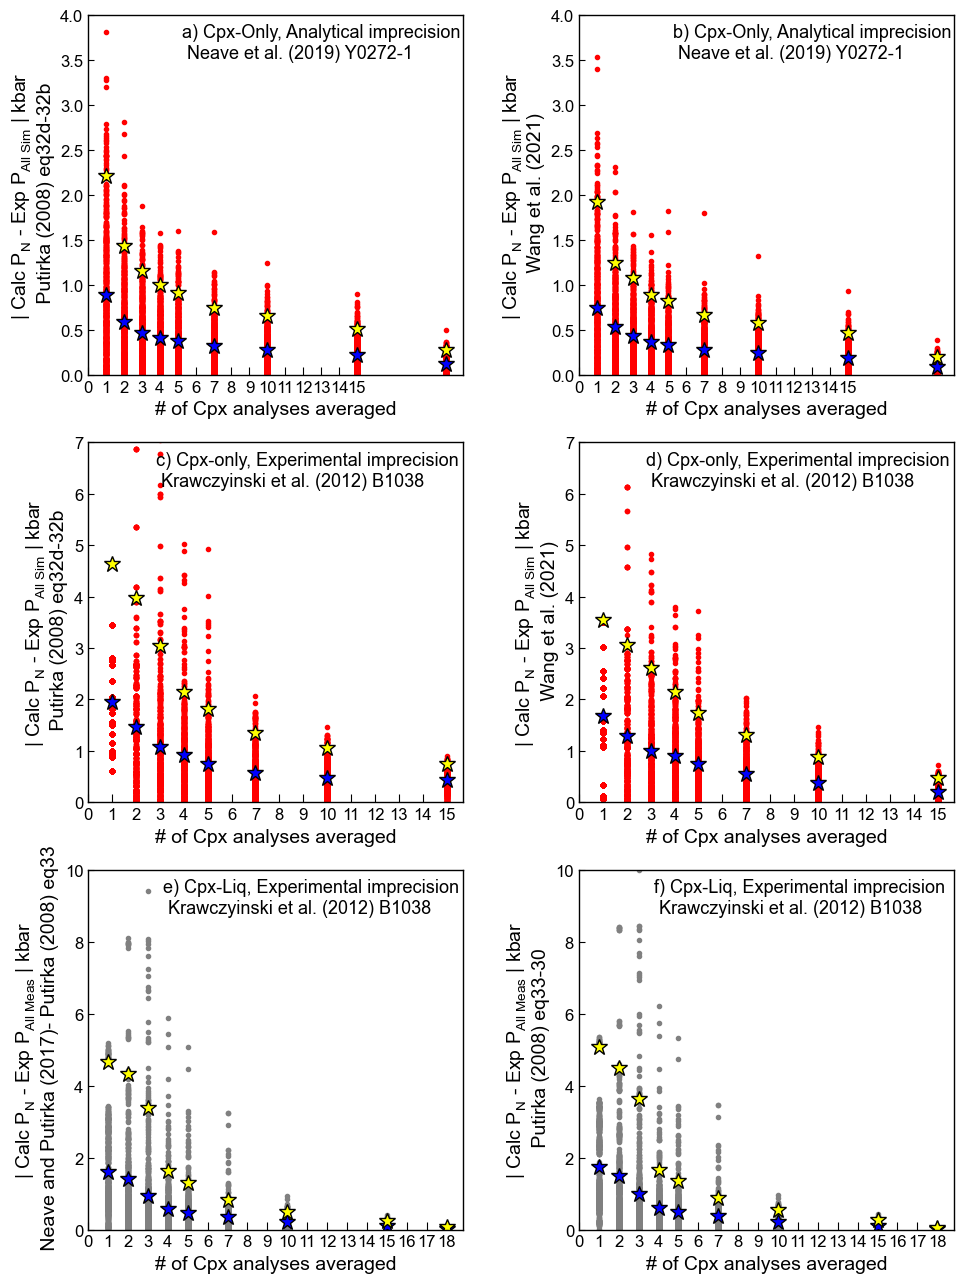

In [20]:
fig, ((ax2, ax1), (ax6, ax5), (ax3, ax4)) = plt.subplots(3, 2, figsize=(10,13))
ms2=12
Av_Cpx1=np.mean(Cpx_ExpY1_Syn['P_Put_Teq32d_Peq32b'])
ax2.plot(Neave_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+1, np.abs(Neave_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+2,  np.abs(Neave_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+3,  np.abs(Neave_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+4,  np.abs(Neave_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+5,  np.abs(Neave_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+7,  np.abs(Neave_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+10,  np.abs(Neave_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+15,  np.abs(Neave_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax2.plot(Neave_100Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+20,  np.abs(Neave_100Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')#ax2.plot(Neave_30Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+30, (Neave_30Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.k')

ms1=7
ax2.plot(1,  np.mean(np.abs(Neave_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax2.plot(2,  np.mean(np.abs(Neave_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(3,  np.mean(np.abs(Neave_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(4,  np.mean(np.abs(Neave_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(5,  np.mean(np.abs(Neave_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(7,  np.mean(np.abs(Neave_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(10,  np.mean(np.abs(Neave_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(15,  np.mean(np.abs(Neave_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)),  '*k', mfc='blue', ms=ms2)
ax2.plot(20,  np.mean(np.abs(Neave_100Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)


ax2.plot(1,  np.nanpercentile(np.abs(Neave_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(2,  np.nanpercentile(np.abs(Neave_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(3,  np.nanpercentile(np.abs(Neave_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(4,  np.nanpercentile(np.abs(Neave_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(5,  np.nanpercentile(np.abs(Neave_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(7,  np.nanpercentile(np.abs(Neave_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(10,  np.nanpercentile(np.abs(Neave_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(15,  np.nanpercentile(np.abs(Neave_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax2.plot(20,  np.nanpercentile(np.abs(Neave_100Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)

ax2.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Sim}$ | kbar \n Putirka (2008) eq32d-32b')
ax2.set_xlabel('# of Cpx analyses averaged')

Av_Cpx1=np.mean(Cpx_ExpY1_Syn['P_Wang21_eq1'])

ax1.plot(Neave_1Cpxs_CompAv['P_Wang21_eq1']*0+1, np.abs(Neave_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_2Cpxs_CompAv['P_Wang21_eq1']*0+2,  np.abs(Neave_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_3Cpxs_CompAv['P_Wang21_eq1']*0+3,  np.abs(Neave_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_4Cpxs_CompAv['P_Wang21_eq1']*0+4,  np.abs(Neave_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_5Cpxs_CompAv['P_Wang21_eq1']*0+5,  np.abs(Neave_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_7Cpxs_CompAv['P_Wang21_eq1']*0+7,  np.abs(Neave_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_10Cpxs_CompAv['P_Wang21_eq1']*0+10,  np.abs(Neave_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_15Cpxs_CompAv['P_Wang21_eq1']*0+15,  np.abs(Neave_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax1.plot(Neave_100Cpxs_CompAv['P_Wang21_eq1']*0+20,  np.abs(Neave_100Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')#ax1.plot(Neave_30Cpxs_CompAv['P_Wang21_eq1']*0+30, (Neave_30Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.k')
# ax1.plot(Neave_40Cpxs_CompAv['P_Wang21_eq1']*0+40, (Neave_40Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.k')
# ax1.plot(Neave_100Cpxs_CompAv['P_Wang21_eq1']*0+100, (Neave_100Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.k')

ms1=7
ax1.plot(1,  np.mean(np.abs(Neave_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(2,  np.mean(np.abs(Neave_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(3,  np.mean(np.abs(Neave_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(4,  np.mean(np.abs(Neave_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(5,  np.mean(np.abs(Neave_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(7,  np.mean(np.abs(Neave_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(10,  np.mean(np.abs(Neave_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(15,  np.mean(np.abs(Neave_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax1.plot(20,  np.mean(np.abs(Neave_100Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)


ax1.plot(1,  np.nanpercentile(np.abs(Neave_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(2,  np.nanpercentile(np.abs(Neave_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(3,  np.nanpercentile(np.abs(Neave_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(4,  np.nanpercentile(np.abs(Neave_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(5,  np.nanpercentile(np.abs(Neave_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(7,  np.nanpercentile(np.abs(Neave_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(10,  np.nanpercentile(np.abs(Neave_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(15,  np.nanpercentile(np.abs(Neave_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax1.plot(20,  np.nanpercentile(np.abs(Neave_100Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)



ax1.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Sim}$ | kbar \n Wang et al. (2021)')
ax1.set_xlabel('# of Cpx analyses averaged')

## This looks at subsampling the 18 measured Cpxs for Cpx-only from Kraw2013

Av_Cpx1=np.mean(Cpx_B1038_Calc['P_Put_Teq32d_Peq32b'])
ax6.plot(KrawMeas_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+1, np.abs(KrawMeas_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+2,  np.abs(KrawMeas_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+3,  np.abs(KrawMeas_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+4,  np.abs(KrawMeas_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+5,  np.abs(KrawMeas_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+7,  np.abs(KrawMeas_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+10,  np.abs(KrawMeas_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')
ax6.plot(KrawMeas_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']*0+15,  np.abs(KrawMeas_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), '.r')

ms1=7
ax6.plot(1,  np.mean(np.abs(KrawMeas_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(2,  np.mean(np.abs(KrawMeas_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(3,  np.mean(np.abs(KrawMeas_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(4,  np.mean(np.abs(KrawMeas_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(5,  np.mean(np.abs(KrawMeas_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(7,  np.mean(np.abs(KrawMeas_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(10,  np.mean(np.abs(KrawMeas_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax6.plot(15,  np.mean(np.abs(KrawMeas_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)


ax6.plot(1,  np.nanpercentile(np.abs(KrawMeas_1Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(2,  np.nanpercentile(np.abs(KrawMeas_2Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(3,  np.nanpercentile(np.abs(KrawMeas_3Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(4,  np.nanpercentile(np.abs(KrawMeas_4Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(5,  np.nanpercentile(np.abs(KrawMeas_5Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(7,  np.nanpercentile(np.abs(KrawMeas_7Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(10,  np.nanpercentile(np.abs(KrawMeas_10Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax6.plot(15,  np.nanpercentile(np.abs(KrawMeas_15Cpxs_CompAv['P_Put_Teq32d_Peq32b']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)

ax6.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Sim}$ | kbar \n Putirka (2008) eq32d-32b')
ax6.set_xlabel('# of Cpx analyses averaged')

Av_Cpx1=np.mean(Cpx_B1038_Calc['P_Wang21_eq1'])

ax5.plot(KrawMeas_1Cpxs_CompAv['P_Wang21_eq1']*0+1, np.abs(KrawMeas_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_2Cpxs_CompAv['P_Wang21_eq1']*0+2,  np.abs(KrawMeas_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_3Cpxs_CompAv['P_Wang21_eq1']*0+3,  np.abs(KrawMeas_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_4Cpxs_CompAv['P_Wang21_eq1']*0+4,  np.abs(KrawMeas_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_5Cpxs_CompAv['P_Wang21_eq1']*0+5,  np.abs(KrawMeas_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_7Cpxs_CompAv['P_Wang21_eq1']*0+7,  np.abs(KrawMeas_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_10Cpxs_CompAv['P_Wang21_eq1']*0+10,  np.abs(KrawMeas_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
ax5.plot(KrawMeas_15Cpxs_CompAv['P_Wang21_eq1']*0+15,  np.abs(KrawMeas_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.r')
# ax5.plot(KrawMeas_40Cpxs_CompAv['P_Wang21_eq1']*0+40, (KrawMeas_40Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.k')
# ax5.plot(KrawMeas_100Cpxs_CompAv['P_Wang21_eq1']*0+100, (KrawMeas_100Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), '.k')

ms1=7
ax5.plot(1,  np.mean(np.abs(KrawMeas_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(2,  np.mean(np.abs(KrawMeas_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(3,  np.mean(np.abs(KrawMeas_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(4,  np.mean(np.abs(KrawMeas_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(5,  np.mean(np.abs(KrawMeas_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(7,  np.mean(np.abs(KrawMeas_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(10,  np.mean(np.abs(KrawMeas_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax5.plot(15,  np.mean(np.abs(KrawMeas_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1)), '*k', mfc='blue', ms=ms2)


ax5.plot(1,  np.nanpercentile(np.abs(KrawMeas_1Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(2,  np.nanpercentile(np.abs(KrawMeas_2Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(3,  np.nanpercentile(np.abs(KrawMeas_3Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(4,  np.nanpercentile(np.abs(KrawMeas_4Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(5,  np.nanpercentile(np.abs(KrawMeas_5Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(7,  np.nanpercentile(np.abs(KrawMeas_7Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(10,  np.nanpercentile(np.abs(KrawMeas_10Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax5.plot(15,  np.nanpercentile(np.abs(KrawMeas_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)



ax5.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Sim}$ | kbar \n Wang et al. (2021)')
ax5.set_xlabel('# of Cpx analyses averaged')




### Mike Cpx-liq


Av_Cpx1=B1038_Cpx_Liq_N17_eq33_Liq_Mean['P_kbar_calc'][0]

ax3.plot(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N'], 
         np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc']-Av_Cpx1),
         '.', color='grey')

ax3.plot(1,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==1]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(2,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==2]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(3,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==3]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(4,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==4]
                         -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(5,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==5]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(7,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==7]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(10,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==10]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(15,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==15]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(18,  np.mean(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==18]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax3.plot(1,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==1]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(2,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==2]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(3,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==3]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(4,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==4]
                         -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(5,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==5]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(7,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==7]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(10,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==10]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(15,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==15]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax3.plot(18,  np.nanpercentile(np.abs(B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==18]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)




Av_Cpx1=B1038_Cpx_Liq_30_eq33_Liq_Mean['P_kbar_calc'][0]

ax4.plot(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N'], 
         np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc']-Av_Cpx1),
       '.', color='grey')

ax4.plot(1,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==1]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(2,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==2]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(3,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==3]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(4,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==4]
                         -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(5,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==5]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(7,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==7]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(10,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==10]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(15,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==15]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(18,  np.mean(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==18]
                            -Av_Cpx1)), '*k', mfc='blue', ms=ms2)
ax4.plot(1,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==1]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(2,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==2]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(3,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==3]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(4,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==4]
                         -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(5,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==5]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(7,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==7]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(10,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==10]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(15,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==15]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)
ax4.plot(18,  np.nanpercentile(np.abs(B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_30_eq33_Loop_Comp_Av['N']==18]
                            -Av_Cpx1),  q=95, interpolation='linear'), '*k', mfc='yellow', ms=ms2)




ax3.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Meas}$ | kbar \n Neave and Putirka (2017)- Putirka (2008) eq33')

ax4.set_ylabel('| Calc P$_{N}$ - Exp P$_{All \ Meas}$ | kbar \n Putirka (2008) eq33-30')
ax3.set_xlabel('# of Cpx analyses averaged')
ax4.set_xlabel('# of Cpx analyses averaged')
ax2.annotate("a) Cpx-Only, Analytical imprecision \n Neave et al. (2019) Y0272-1", xy=(0.25, 0.88), xycoords="axes fraction", fontsize=13)
ax1.annotate("b) Cpx-Only, Analytical imprecision \n Neave et al. (2019) Y0272-1", xy=(0.25, 0.88), xycoords="axes fraction", fontsize=13)
ax5.annotate("d) Cpx-only, Experimental imprecision \n Krawczyinski et al. (2012) B1038", xy=(0.18, 0.88), xycoords="axes fraction", fontsize=13)
ax6.annotate("c) Cpx-only, Experimental imprecision \n Krawczyinski et al. (2012) B1038", xy=(0.18, 0.88), xycoords="axes fraction", fontsize=13)
ax3.annotate("e) Cpx-Liq, Experimental imprecision \n Krawczyinski et al. (2012) B1038", xy=(0.20, 0.88), xycoords="axes fraction", fontsize=13)
ax4.annotate("f) Cpx-Liq, Experimental imprecision \n Krawczyinski et al. (2012) B1038", xy=(0.20, 0.88), xycoords="axes fraction", fontsize=13)

ax2.set_ylim([0, 4])
ax1.set_ylim([0, 4])
ax3.set_ylim([0, 10])
ax4.set_ylim([0, 10])
ax5.set_ylim([0, 7])
ax6.set_ylim([0, 7])
ax1.set_xticks(np.linspace(0, 15, 16))
ax2.set_xticks(np.linspace(0, 15, 16))
ax3.set_xticks(np.linspace(0, 18, 19))
ax4.set_xticks(np.linspace(0, 18, 19))
ax5.set_xticks(np.linspace(0, 15, 16))
ax6.set_xticks(np.linspace(0, 15, 16))
fig.tight_layout()
fig.savefig('simulating_nos_of_analyses.png', dpi=200)


In [21]:
np.nanpercentile(np.abs(KrawMeas_15Cpxs_CompAv['P_Wang21_eq1']-Av_Cpx1), q=95)

3.7874571614631325

## Big 6 part figure -  Change in pressure vs N cpxs
- Using analytical error for both Cpx-only, experimental error for Mike

In [22]:
np.mean(np.abs((B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['P_kbar_calc'].loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==1]
                            -Av_Cpx1)))

5.599892901105582

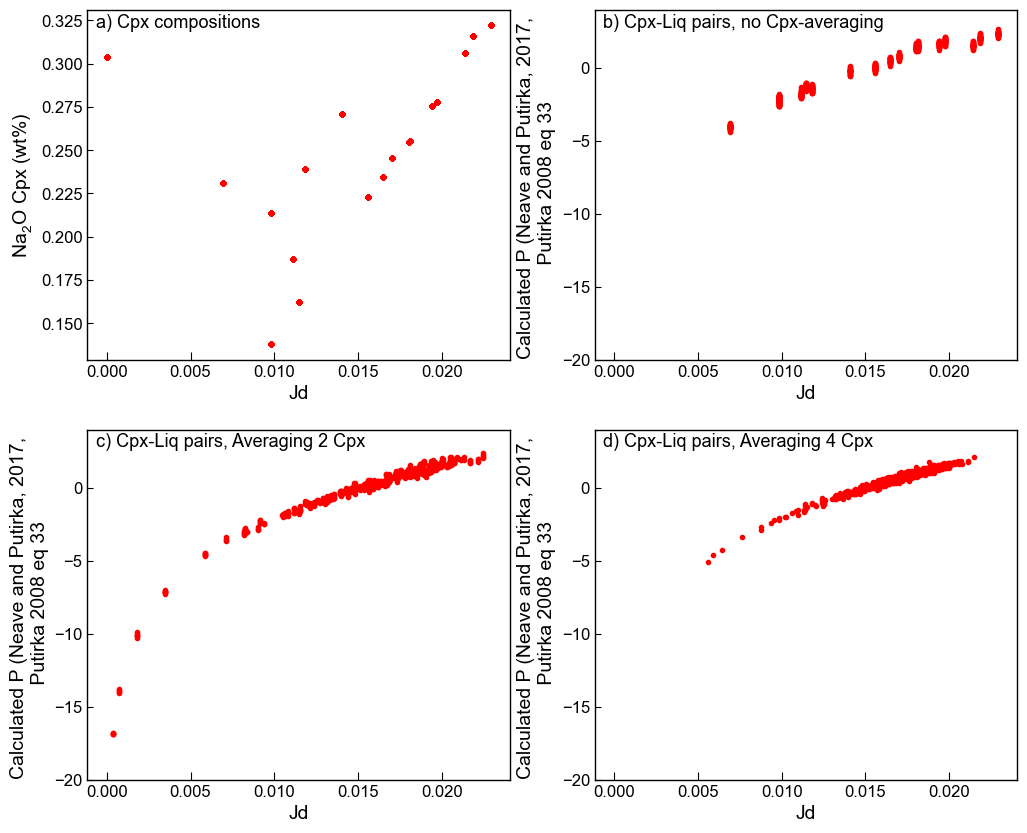

In [23]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12,10), sharex=True)


N1=B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av.loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==1]
N2=B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av.loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==2]
N4=B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av.loc[B1038_Cpx_Liq_N17_eq33_Loop_Comp_Av['N']==4]

# plt.plot(N1['Jd'], N1['P_kbar_calc'], '.r')
# plt.plot(N2['Jd'], N2['P_kbar_calc'], '.b')
ax0.plot(N1['Jd'], N1['Na2O_Cpx'], '.r')
x='Jd'
N1JdAl=N1.loc[N1['Jd_from 0=Na, 1=Al']==1]
N2JdAl=N2.loc[N2['Jd_from 0=Na, 1=Al']==1]
N1JdNa=N1.loc[N1['Jd_from 0=Na, 1=Al']==0]
N2JdNa=N2.loc[N2['Jd_from 0=Na, 1=Al']==0]
N4JdAl=N4.loc[N4['Jd_from 0=Na, 1=Al']==0]
N4JdAl=N4.loc[N4['Jd_from 0=Na, 1=Al']==1]

ax1.plot(N1[x], N1['P_kbar_calc'], '.r')
ax2.plot(N2[x], N2['P_kbar_calc'], '.r')
ax3.plot(N4[x], N4['P_kbar_calc'], '.r')

ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax3.yaxis.set_tick_params(which='both', labelbottom=True)
ax0.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)

ax1.set_ylabel('Calculated P (Neave and Putirka, 2017, \n Putirka 2008 eq 33')
ax2.set_ylabel('Calculated P (Neave and Putirka, 2017, \n Putirka 2008 eq 33')
ax3.set_ylabel('Calculated P (Neave and Putirka, 2017, \n Putirka 2008 eq 33')
ax0.set_ylabel('Na$_2$O Cpx (wt%)')

ax1.set_xlabel('Jd')
ax2.set_xlabel('Jd')
ax3.set_xlabel('Jd')
ax0.set_xlabel('Jd')
ax0.annotate("a) Cpx compositions", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=13)
ax1.annotate("b) Cpx-Liq pairs, no Cpx-averaging ", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=13)
ax2.annotate("c) Cpx-Liq pairs, Averaging 2 Cpx", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=13)
ax3.annotate("d) Cpx-Liq pairs, Averaging 4 Cpx", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=13)

ax1.set_ylim([-20, 4])
ax2.set_ylim([-20, 4])
ax3.set_ylim([-20, 4])
fig.savefig('Suplement_Jd_averaging.png')


In [24]:


N1=Neave_1Cpxs_CompAv['Jd']
N2=Neave_2Cpxs_CompAv['Jd']
N4=Neave_4Cpxs_CompAv['Jd']

# plt.plot(N1['Jd'], N1['P_kbar_calc'], '.r')
# plt.plot(N2['Jd'], N2['P_kbar_calc'], '.b')

x='Jd'
N1JdAl=N1.loc[N1['Jd_from 0=Na, 1=Al']==1]
N2JdAl=N2.loc[N2['Jd_from 0=Na, 1=Al']==1]
N1JdNa=N1.loc[N1['Jd_from 0=Na, 1=Al']==0]
N2JdNa=N2.loc[N2['Jd_from 0=Na, 1=Al']==0]
N4JdAl=N4.loc[N4['Jd_from 0=Na, 1=Al']==0]
N4JdAl=N4.loc[N4['Jd_from 0=Na, 1=Al']==1]

ax1.plot(N1[x], N1['P_kbar_calc'], '.r')
ax2.plot(N2[x], N2['P_kbar_calc'], '.r')
ax3.plot(N4[x], N4['P_kbar_calc'], '.r')

ax2.yaxis.set_tick_params(which='both', labelbottom=True)
ax1.set_ylabel('Calculated P (Neave and Putirka, 2017, Putirka 2008 eq 33')
ax1.set_xlabel('Jd')


KeyError: 'Jd_from 0=Na, 1=Al'

In [ ]:
plt.plot(N2JdAl[x], N2JdAl['T_K_calc'], '.b')
plt.plot(N1JdAl[x], N1JdAl['T_K_calc'], '.r')
plt.plot(N2Jd[x], N2JdNa['T_K_calc'], '.k')
#plt.plot(N1JdAl[x], N1JdNa['T_K_calc'], '.r')

In [ ]:
N2JdAl['Al2O3_Cpx']

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(N2['Al_VI_cat_6ox'], N2['Jd'], '.b')
ax1.plot(B1038_Cpx_Liq_N17_eq33_Liq['Al_VI_cat_6ox'], B1038_Cpx_Liq_N17_eq33_Liq['Jd'], 'ok', mfc='red', ms=5)

ax2.plot(N2['Jd'], N2['P_kbar_calc'], '.b')
ax2.plot(B1038_Cpx_Liq_N17_eq33_Liq['Jd'], B1038_Cpx_Liq_N17_eq33_Liq['P_kbar_calc'], 'ok', mfc='red', ms=5)

#plt.plot(N1JdAl['Jd'], N1JdAl['P_kbar_calc'], '.r')
#plt.plot(Cpx_B1038_Calc['Jd'], Cpx_B1038_Calc['Al2O3_Cpx'], 'or')


In [ ]:
Cpx_B1038_Calc